In [1]:
using StatsBase, Printf, Plots
gr()

function ysm(high, low, pop, n)
    wealth = ones(Float64, pop)
    maxwealth = zeros(Float64, n)
    for i = 1:n
        p = sample(1:pop, 2, replace=false)
        (poor, rich) = wealth[p[1]] <= wealth[p[2]] ? (p[1], p[2]) : (p[2], p[1])
        flip = rand(Bool) # true if poorer player wins.
        base = wealth[poor]
        if flip
            wealth[poor] += high * base
            wealth[rich] -= high * base
        else
            wealth[poor] -= low * base
            wealth[rich] += low * base
        end
        maxwealth[i] = 100 * maximum(wealth) / pop
    end
    wealth, maxwealth
end

function display(wealth)
    total = length(wealth)
    @printf("Total Wealth: %0.0f\n", total)
    for i in 1:length(wealth)
        @printf("%0.0f: %0.2f\n", i, wealth[i] * 100 / total)
    end
end

function wealthiest(w)
    total = length(w)
    m = maximum(w)
    100m / total
end

function lorenz(wealth)
    sort!(wealth)
    w = sum(wealth)
    n = length(wealth)
    result = Vector{Tuple{Float64, Float64}}(undef, n)
    x = 0.0
    t = 0.0
    for i = 1:n
        x += 1.0 / n
        t += wealth[i] / w
        result[i] = (x, t)
    end
    gini = map(x -> x[2], result) |> sum
    (result, 1 - 2 * gini / n)
end

function lorenzplot(wealth)
    (w, g)  = lorenz(wealth)
    gini = @sprintf("Gini Coefficient = %0.2f", abs(g))
    plot( w, 
          xlabel="Cummulative share of people", 
          ylabel="Cummulative share of wealth",
          title="Lorenz Curve",
          legend=false,
          fill=(0, :orange),
          linewidth=3,
          annotations = (0.5, 0.5, gini)
        )
end

lorenzplot (generic function with 1 method)

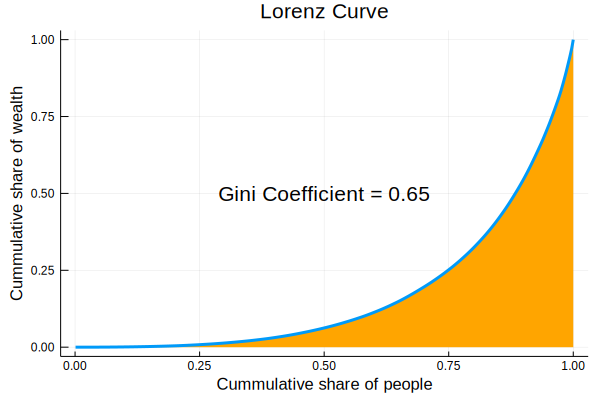

In [2]:
(w, _) = ysm(0.2, 0.17, 1000, 100_000)
lorenzplot(w)

In [7]:
(w2, m2) = ysm(0.2, 0.17, 1000, 100_000_000);

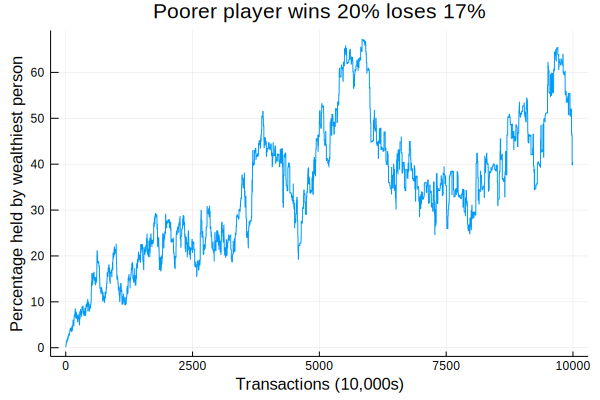

In [8]:
plot(m2[1:10_000:end], 
        xlabel="Transactions (10,000s)", 
        ylabel="Percentage held by wealthiest person", 
        legend=false,
        title="Poorer player wins 20% loses 17%"
    )

In [13]:
y = sort(w2, rev=true)
y[1:10]

10-element Array{Float64,1}:
 403.9583175325272    
 387.91097863424505   
  74.22356921097551   
  73.29924406705518   
  26.000034342417216  
  16.068549167894187  
  12.54320370674293   
   2.332254080707391  
   1.5389813165222548 
   0.49547039601197135